In [281]:
import pandas as pd
import numpy as np
pd.set_option("display.precision", 2)

# import for plotting
from matplotlib import pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

In [282]:
df = pd.read_csv('iplauction2023.csv')
df.head()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD


In [283]:
df.rename(columns={'base price (in lacs)': 'base_price', 'final price (in lacs)': 'final_price'}, inplace=True)
df.head()

,name,player style,nationality,base_price,final_price,franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD


In [284]:
# base price statistics
df['base_price'].describe()

count    151.00
mean      59.21
std       59.69
min       20.00
25%       20.00
50%       20.00
75%       75.00
max      200.00
Name: base_price, dtype: float64

In [285]:
# final price statistics
df['final_price'].describe()

count     238.00
mean      368.07
std       449.07
min        20.00
25%        21.25
50%       150.00
75%       625.00
max      1850.00
Name: final_price, dtype: float64

In [286]:
df.shape

(309, 7)

In [287]:
# player counts by status
df['status'].value_counts()

status
RETAINED    158
SOLD         80
UNSOLD       71
Name: count, dtype: int64

In [288]:
# player counts by nationality
df['nationality'].value_counts()

nationality
India           201
England          24
South Africa     19
West Indies      14
Australia        14
New Zealand      11
Sri Lanka         8
Afghanistan       7
Bangladesh        4
Ireland           2
Zimbabwe          2
Namibia           1
Netherlands       1
Singapore         1
Name: count, dtype: int64

In [289]:
# player counts by style
df['player style'].value_counts()

player style
Bowler        111
Allrounder    103
Batter         55
WK-Batter      40
Name: count, dtype: int64

In [290]:
# player counts by franchise
df['franchise'].value_counts()

franchise
RR      25
SRH     25
LSG     25
CSK     25
RCB     25
GT      25
DC      24
MI      23
PBKS    22
KKR     19
Name: count, dtype: int64

In [291]:
# checking retention number of retentions per franchise
df.groupby('franchise')['status'].agg(
    lambda x: x[x == 'RETAINED'].size
)

franchise
CSK     18
DC      19
GT      18
KKR     11
LSG     15
MI      15
PBKS    16
RCB     18
RR      16
SRH     12
Name: status, dtype: int64

In [292]:
# checking retention/sold statistics per franchise
df.groupby('franchise')['status'].value_counts(normalize=True)

franchise  status  
CSK        RETAINED    0.72
           SOLD        0.28
DC         RETAINED    0.79
           SOLD        0.21
GT         RETAINED    0.72
           SOLD        0.28
KKR        RETAINED    0.58
           SOLD        0.42
LSG        RETAINED    0.60
           SOLD        0.40
MI         RETAINED    0.65
           SOLD        0.35
PBKS       RETAINED    0.73
           SOLD        0.27
RCB        RETAINED    0.72
           SOLD        0.28
RR         RETAINED    0.64
           SOLD        0.36
SRH        SOLD        0.52
           RETAINED    0.48
Name: proportion, dtype: float64

<Axes: xlabel='Franchise', ylabel='Status'>

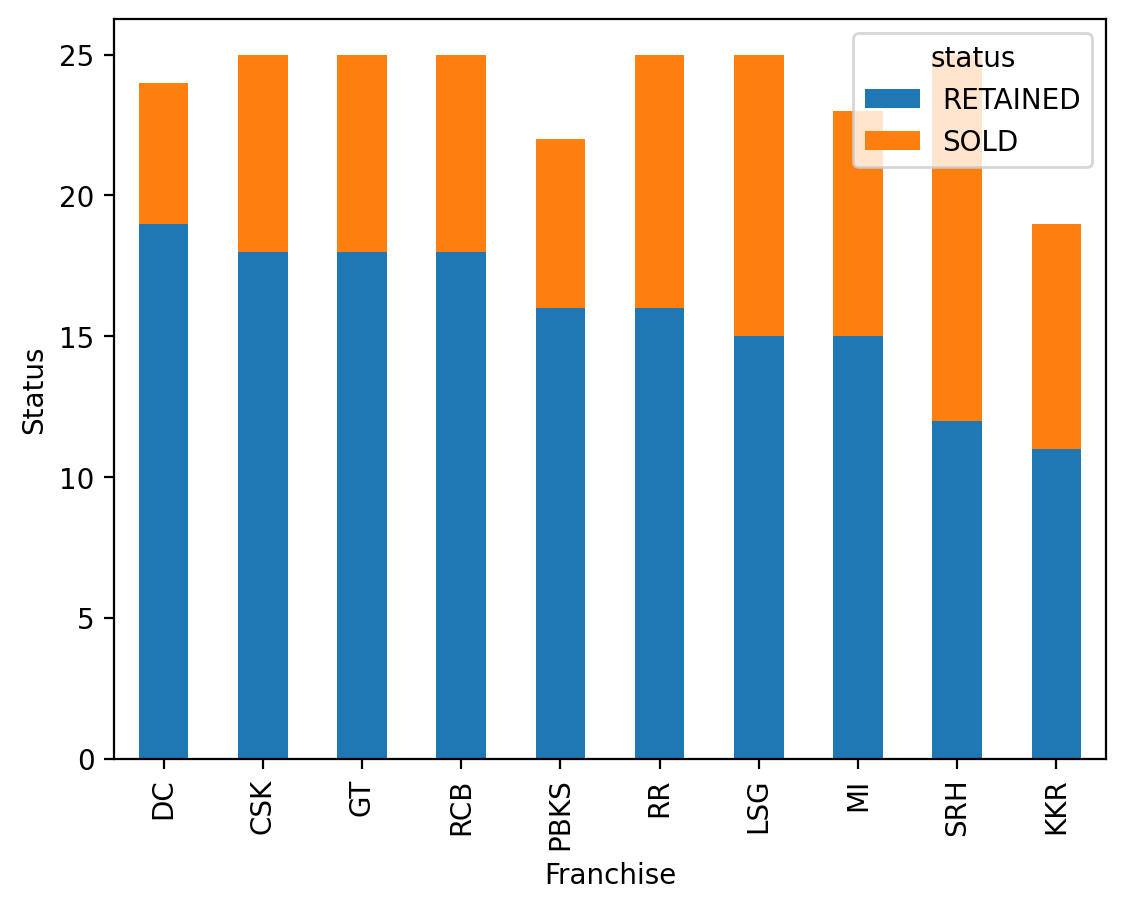

In [293]:
# creating dataframe for players retained, sold for each franchise
franchise_status_df = df.groupby(['franchise', 'status']).size().unstack().sort_values(by='RETAINED', ascending=False)
franchise_status_df.plot(kind='bar', stacked=True, xlabel='Franchise', ylabel='Status')

In [294]:
# checking stats for players retained by style
df.groupby('player style')['status'].value_counts()

player style  status  
Allrounder    RETAINED    45
              SOLD        32
              UNSOLD      26
Batter        RETAINED    32
              SOLD        12
              UNSOLD      11
Bowler        RETAINED    62
              SOLD        25
              UNSOLD      24
WK-Batter     RETAINED    19
              SOLD        11
              UNSOLD      10
Name: count, dtype: int64

In [295]:
# checking normalized version to compare
df.groupby('player style')['status'].value_counts(normalize=True)

player style  status  
Allrounder    RETAINED    0.44
              SOLD        0.31
              UNSOLD      0.25
Batter        RETAINED    0.58
              SOLD        0.22
              UNSOLD      0.20
Bowler        RETAINED    0.56
              SOLD        0.23
              UNSOLD      0.22
WK-Batter     RETAINED    0.47
              SOLD        0.28
              UNSOLD      0.25
Name: proportion, dtype: float64

<Axes: xlabel='Player Style', ylabel='Status'>

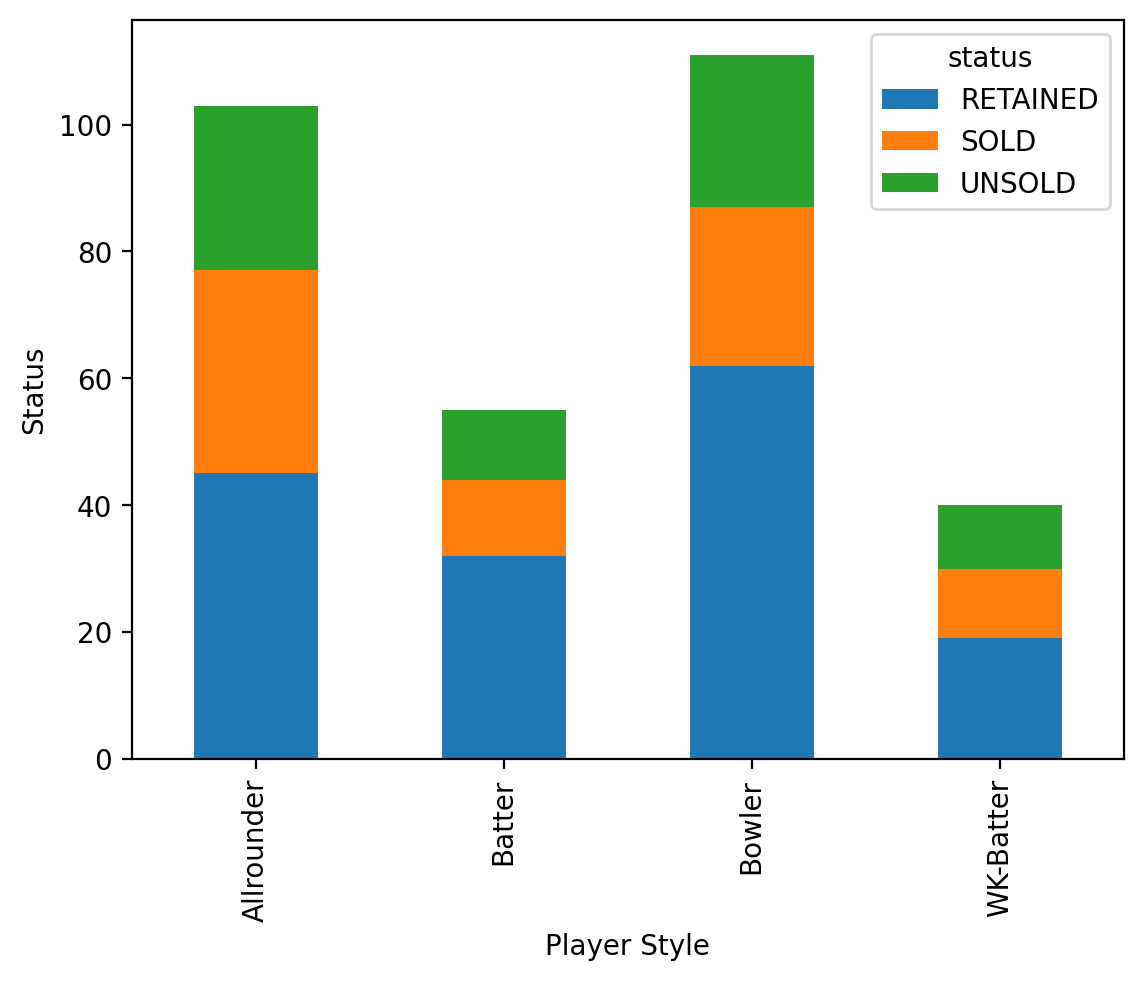

In [296]:
# plotting player status by style
style_status_df = df.groupby(['player style', 'status']).size().unstack()
style_status_df.plot(kind='bar', stacked=True, xlabel='Player Style', ylabel='Status')

<Axes: xlabel='player style'>

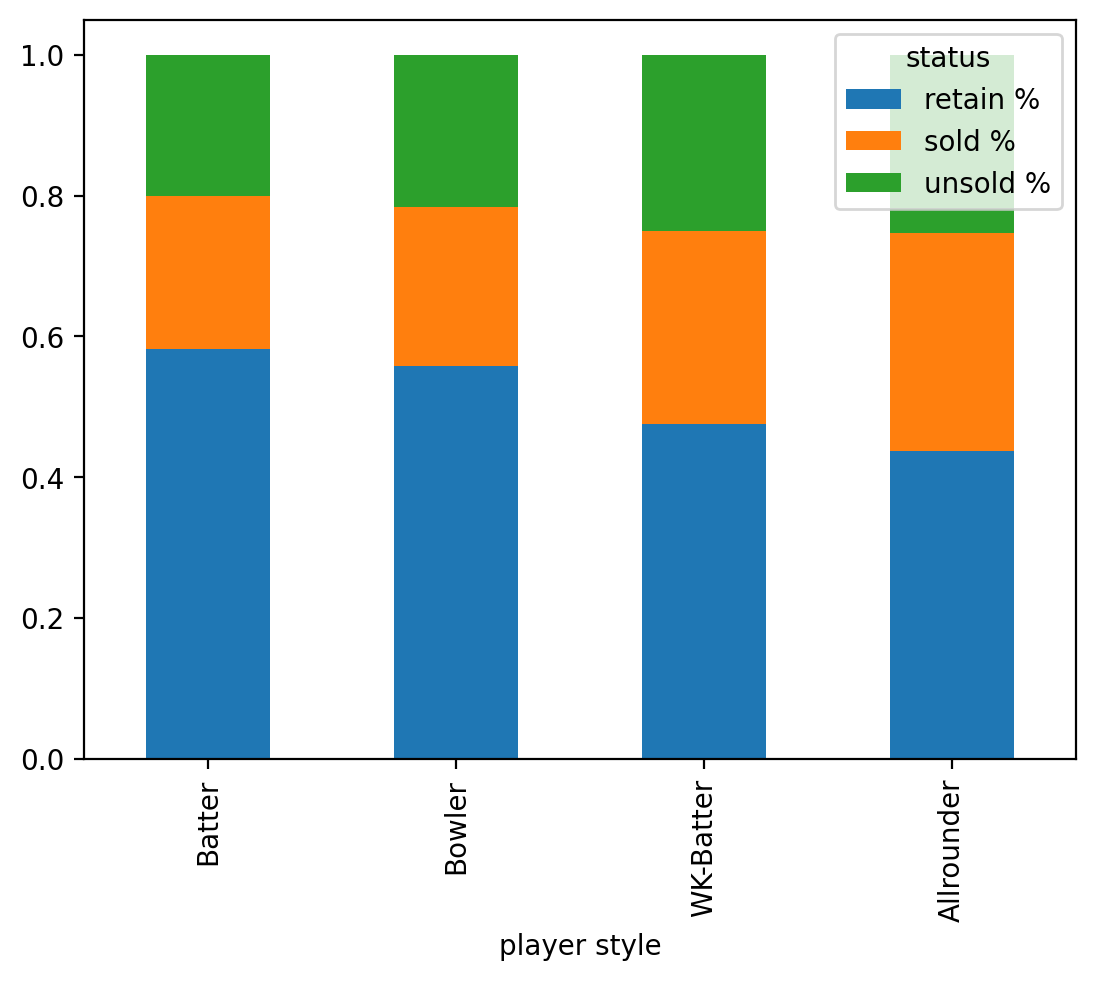

In [297]:
# to better compare the 'demand' for each position, will be using proportions
# this is because the total height of each stacked bar in above chart is limited by the pool of players available

# first, get proportions for each status
style_status_df['total'] = style_status_df['RETAINED']+style_status_df['SOLD']+style_status_df['UNSOLD']
style_status_df['retain %'] = style_status_df['RETAINED']/style_status_df['total']
style_status_df['sold %'] = style_status_df['SOLD']/style_status_df['total']
style_status_df['unsold %'] = style_status_df['UNSOLD']/style_status_df['total']
style_status_df.sort_values(by=['retain %', 'sold %', 'unsold %'], ascending=False, inplace=True)

# then, plot each proportion in stacked bar
style_status_df.plot(y=['retain %', 'sold %', 'unsold %'],kind='bar', stacked=True)

In [298]:
# from above, we can affirm that Allrounder were least in demand, followed closely by WK-Batter
# this makes sense as a team does not require multiple positions filling in these roles.

In [299]:
# analysing prices by style, can give an idea of what was sought after
df.groupby('player style')['final_price'].describe()

,count,mean,std,min,25%,50%,75%,max
player style,,,,,,,,
Allrounder,77.0,376.30,485.56,20.0,20.00,100.0,650.00,1850.0
Batter,44.0,425.11,441.59,20.0,50.00,260.0,781.25,1600.0
Bowler,87.0,290.34,350.93,20.0,30.00,120.0,420.00,1500.0
WK-Batter,30.0,488.67,581.01,20.0,31.25,170.0,675.00,1700.0


In [309]:
# storing mean and median price
style_price_df = df.groupby('player style')[['base_price', 'final_price']].agg(['mean', 'median'])
style_price_df

base_price        final_price       
                   mean median        mean median
player style                                     
Allrounder        60.43   20.0      376.30  100.0
Batter            75.65   20.0      425.11  260.0
Bowler            56.02   50.0      290.34  120.0
WK-Batter         45.24   20.0      488.67  170.0

<Axes: ylabel='WK-Batter'>

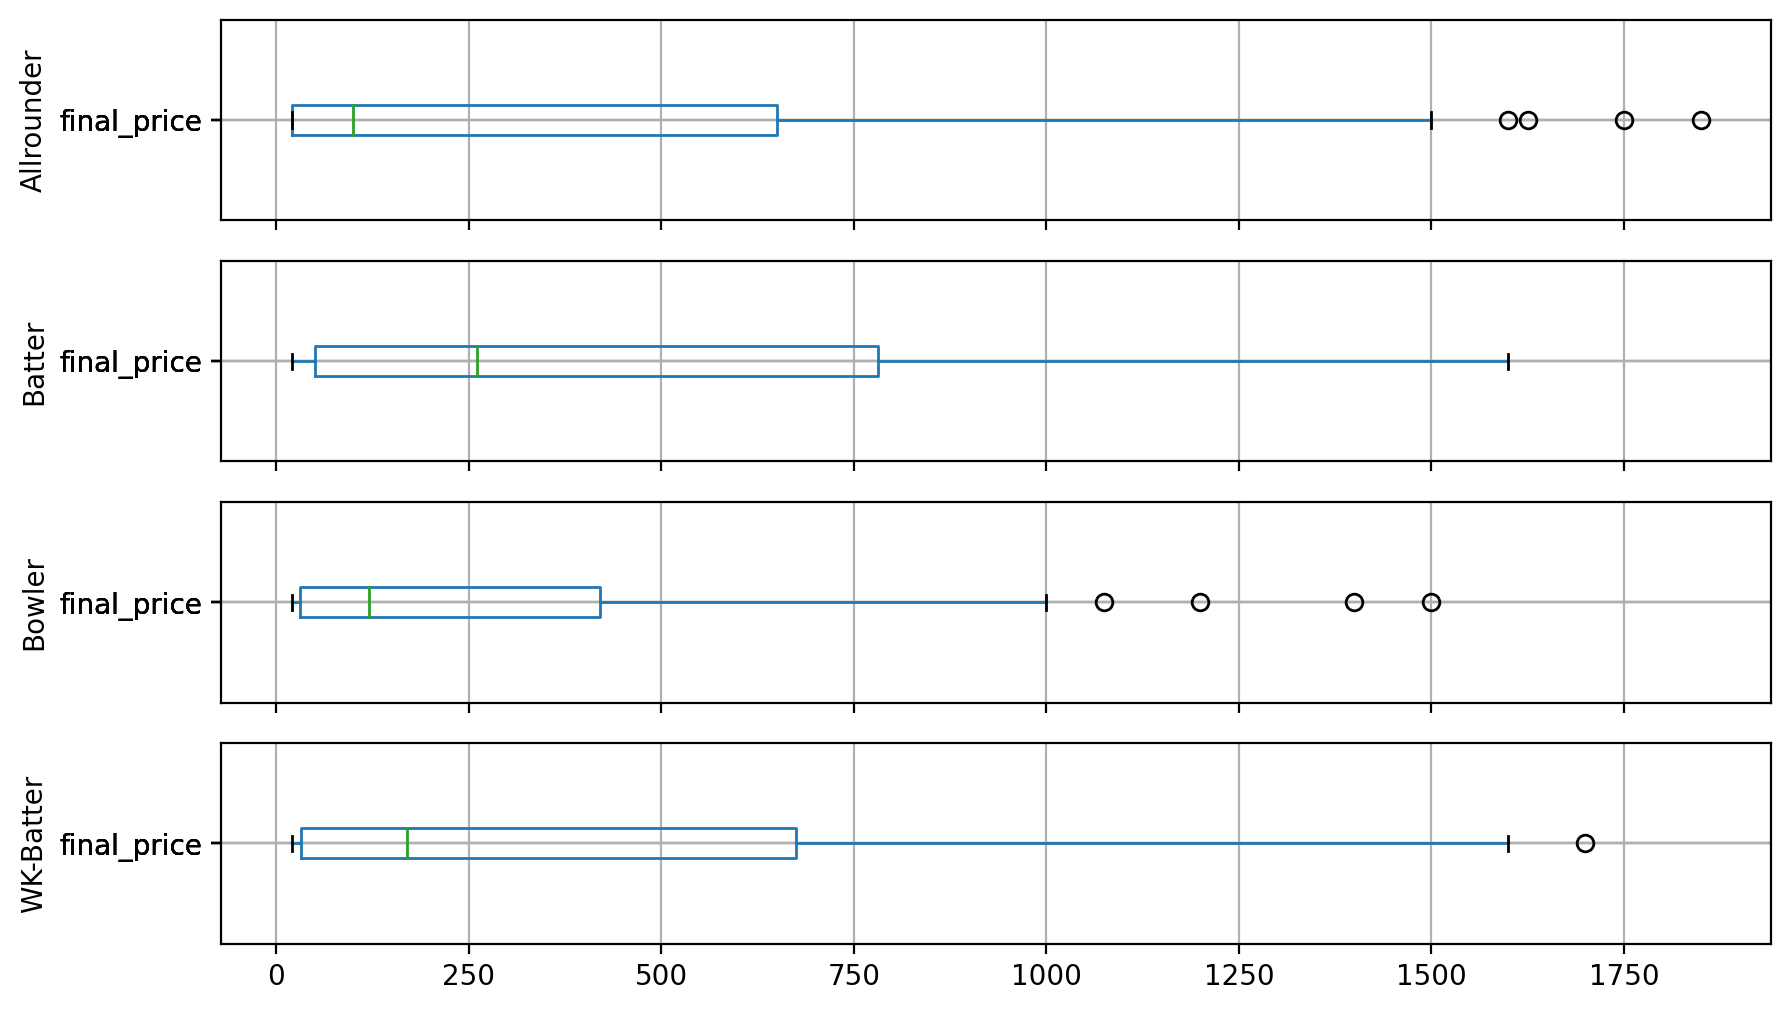

In [337]:
# plotting histogram for each player style and the corresponding final price
figure, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(10, 6), sharex=True, sharey=True)
df.loc[df['player style']=='Allrounder'].boxplot(ax=ax1, column='final_price', vert=False, ylabel='Allrounder')
df.loc[df['player style']=='Batter'].boxplot(ax=ax2, column='final_price', vert=False, ylabel='Batter')
df.loc[df['player style']=='Bowler'].boxplot(ax=ax3, column='final_price', vert=False, ylabel='Bowler')
df.loc[df['player style']=='WK-Batter'].boxplot(ax=ax4, column='final_price', vert=False, ylabel='WK-Batter')

In [338]:
# most expensive player
df.loc[df['final_price'] == df['final_price'].max()]

,name,player style,nationality,base_price,final_price,franchise,status
150,Sam Curran,Allrounder,England,200.0,1850.0,PBKS,SOLD


In [343]:
# most expensive player in each style
style_max_prices = df.groupby('player style')['final_price'].max().reset_index()
style_max_prices = pd.merge(df, style_max_prices, on=['player style', 'final_price'])
style_max_prices

,name,player style,nationality,base_price,final_price,franchise,status
0,Sam Curran,Allrounder,England,200.0,1850.0,PBKS,SOLD
1,Rohit Sharma,Batter,India,NaN,1600.0,MI,RETAINED
2,KL Rahul,WK-Batter,India,NaN,1700.0,LSG,RETAINED
3,Rashid Khan,Bowler,Afghanistan,NaN,1500.0,GT,RETAINED


In [346]:
# checking how much each team spent
df.groupby('franchise')['final_price'].sum()

franchise
CSK     9350.0
DC      8685.0
GT      9055.0
KKR     6410.0
LSG     9065.0
MI      9420.0
PBKS    8280.0
RCB     9325.0
RR      9165.0
SRH     8845.0
Name: final_price, dtype: float64